In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../../..'))
	print(os.getcwd())
except:
	pass


 ## Author: Eric Reyes
 ## Sep 1 2019
 ## EE110

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import csv 
import pandas as pd
from sympy import symbols, solve
import sympy


In [2]:
plt.rcParams["figure.figsize"] = (20,3)

In [3]:
csv = pd.read_csv("src/EE110/HW2/RC_ramp_step_pulse.txt",sep='\t');

 ## Plot for measured responses

Text(0.5, 0, 'Time')

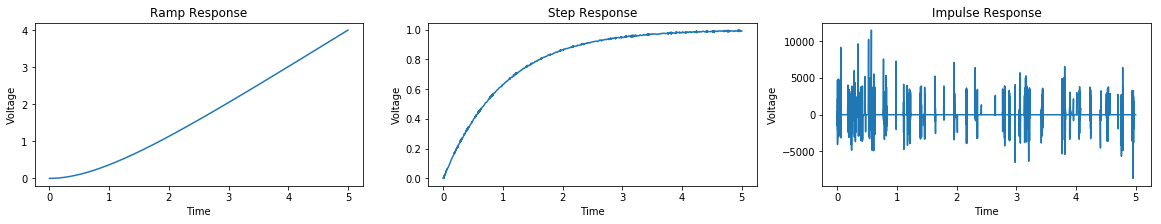

In [4]:

plt.subplot(1,3,1)
plt.plot(csv['time'],csv['V(2)'])
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.title("Ramp Response")
plt.subplot(1,3,2)
plt.plot(csv['time'],csv['V(d1)'])
plt.title("Step Response")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.subplot(1,3,3)
plt.plot(csv['time'],csv['V(d2)'])
plt.title("Impulse Response")
plt.ylabel("Voltage")
plt.xlabel("Time")

 ## Plot for numerically derived responses

Text(0.5, 0, 'Time')

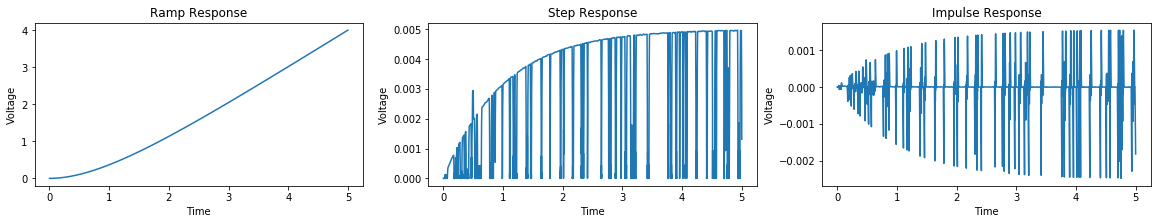

In [5]:
plt.subplot(1,3,1)
plt.plot(csv['time'],csv['V(2)'])
plt.title("Ramp Response")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.subplot(1,3,2)
plt.plot(csv['time'],np.gradient(csv['V(2)']))
plt.title("Step Response")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.subplot(1,3,3)
plt.plot(csv['time'],np.gradient(np.gradient(csv['V(2)'])))
plt.title("Impulse Response")
plt.ylabel("Voltage")
plt.xlabel("Time")


 ## Plot for mathematically derived response
 $h(t) = 1/\tau_c*e^{-t/\tau_c} \\
  y_{step}(t) = 1-e^{-t/\tau_c} \\
  y_{ramp}(t) = t+\tau_c e^{-t/\tau_c}-1$
 ### solving for tau

In [6]:
t, tau = symbols('t tau')
ramp_response = t+tau*sympy.functions.elementary.exponential.exp(-t/tau)-1
t_o = csv['time'][0]
v_o=csv['V(2)'][0]
sol = solve(ramp_response.subs(t,t_o),v_o,(tau))
print(f'tau_c = {sol[0][tau]}')
tau_c = sol[0][tau]
# print("tau_c =", sol[0]["tau"])
# ramp_response.subs(t,csv['time'][0])
# print(solve(ramp_response.subs(t,t_o)==v_o,(tau)))


tau_c = 1.00000000000000


In [7]:
# Declaring response functions
exp = lambda x: sympy.functions.elementary.exponential.exp(x)
impulse = np.vectorize(lambda t: 1/(tau_c)*exp(-t/tau_c))
step = np.vectorize(lambda t: 1-exp(-t/tau_c))
ramp = np.vectorize(lambda t: t+tau_c*exp(-t/tau_c)-1)


Text(0.5, 0, 'Time')

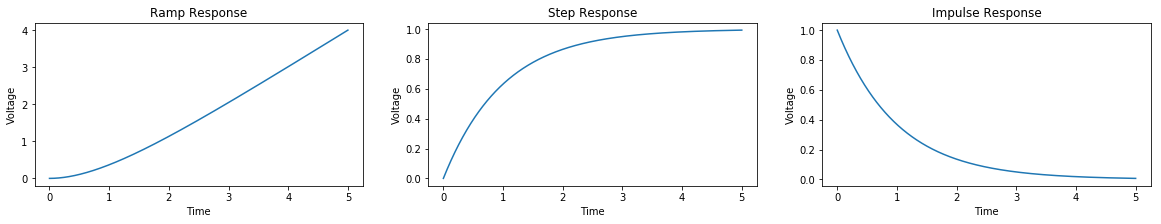

In [8]:
plt.subplot(1,3,1)
plt.plot(csv['time'],ramp(csv['time']))
plt.title("Ramp Response")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.subplot(1,3,2)
plt.plot(csv['time'],step(csv['time']))
plt.title("Step Response")
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.subplot(1,3,3)
plt.plot(csv['time'],impulse(csv['time']))
plt.title("Impulse Response")
plt.ylabel("Voltage")
plt.xlabel("Time")


 As expected the plots are all very similar however the measured response
 has a significant amount of noise that
 is also apparent in the numerically derived response.
 However the mathematically computed response has the expected
 output with a clean signal.